In [47]:
import bokeh
from bokeh.io import output_file, show, export_png, output_notebook, export_svg
from bokeh.plotting import figure
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [48]:
root = '/home/clement/Documents/Clement/VisionTransformer/ImageSurvey/app/samples_survey'

img_path  = os.path.join(root, 'Images')
heatmap_path = os.path.join(root, 'Heatmap')
methods = os.listdir(heatmap_path)
list_files = os.listdir(img_path)

In [49]:
list_files.sort()

In [106]:
def blend(src1, src2, alpha=0.5):
    beta = (1.0 - alpha)
    return cv2.addWeighted(src1, alpha, src2, beta, 0.0)

cnv_files = [c for c in list_files if c.startswith('CNV')][15:16] 
dme_files = [c for c in list_files if c.startswith('DME')][:1] 
drusen_files = [c for c in list_files if c.startswith('DRUSEN')][1:2] 

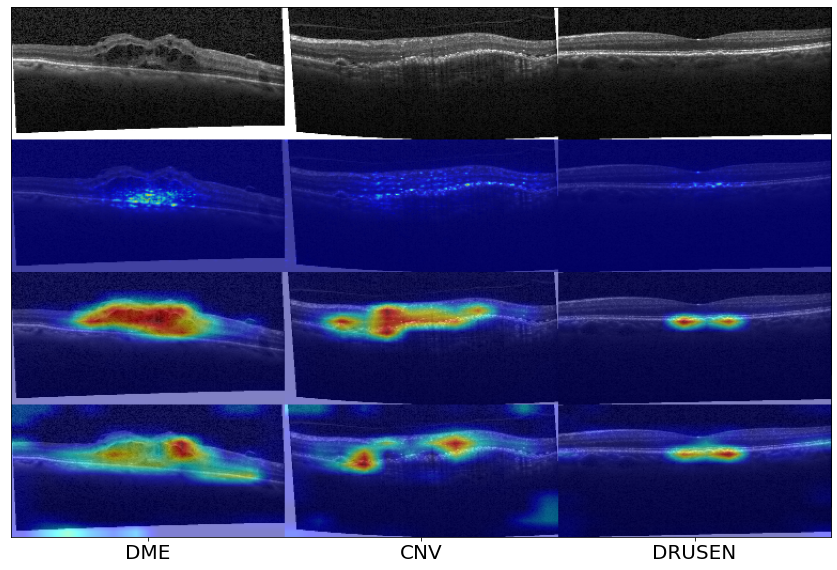

In [122]:
fig, ax = plt.subplots()
h_stack = None
for file in (dme_files+cnv_files+drusen_files):
    img = cv2.imread(os.path.join(img_path, file))
    img = cv2.resize(img, (0,0), fx=0.25, fy=0.25)
    stack = img
    for m in methods:
        if m == 'DTD_ResNet152':
            alpha = 0.25
        else:
            alpha = 0.5
        heatmap = cv2.imread(os.path.join(heatmap_path, m, file))[:,:, ::-1]
        heatmap = cv2.resize(heatmap, (0,0), fx=0.25, fy=0.25)
        heatmap = blend(img, heatmap, alpha)
        stack = np.vstack([stack, heatmap])
    if h_stack is None:
        h_stack = stack
    else:
        h_stack = np.hstack([h_stack, stack])
    

# tick_position, step = np.linspace(0, h_stack.shape[0], 4, endpoint=False, retstep=True) 
# ax.set_yticks(tick_position+step/2)      
# ax.set_yticklabels(['Bscans']+methods)
ax.set_yticks([])
labels = ['DME']*len(dme_files)+['CNV']*len(cnv_files)+['DRUSEN']*len(drusen_files)
tick_position, step = np.linspace(0, h_stack.shape[1], len(labels), endpoint=False, retstep=True) 
ax.set_xticks(tick_position+step/2)      
ax.set_xticklabels(labels)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
        
fig.set_size_inches(12, 8)
ax.imshow(h_stack)
plt.tight_layout()
fig.savefig('heatmap_examples.pdf', bbox_inches='tight')
fig.show()

In [70]:
locs = ax.get_yticks()
locs

array([-100.,    0.,  100.,  200.,  300.,  400.,  500.])

In [120]:
methods

['DTD_ResNet152', 'LRP_ViT', 'Attention_ViT']